<a href="https://colab.research.google.com/github/arifanwar0243/colabs/blob/main/Arif_Anwar_Rosyidin_tricycle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

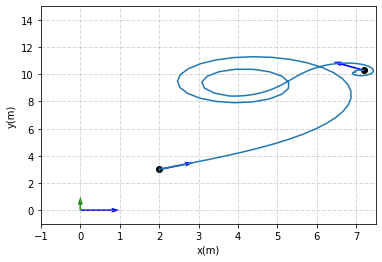

Posisi akhir =  [ 7.19912462 10.28891625]
Sudut orientasi akhir =  140.6951445321172
99


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def rotation(theta):
  R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
  return R

def objectdrawing(o, d, R):
  i = np.array([1,0])
  ii = R @ i 
  oo = o + d
  plt.quiver(*oo, *ii, scale=1, color='b', scale_units='xy', angles = 'xy', width=0.005)
  plt.scatter(oo[0], oo[1], color='k')

def framedrawing(o, d, R):
  i = np.array([1,0])
  j = np.array([0,1])
  ii = R @ i 
  jj = R @ j 
  oo = o + d
  plt.quiver(*oo, *ii, scale=1, color='b', scale_units='xy', angles = 'xy', width=0.005)
  plt.quiver(*oo, *jj, scale=1, color='g', scale_units='xy', angles = 'xy', width=0.005)


#frame reference
R0 = rotation(0)
framedrawing(np.array([0,0]), np.array([0,0]), R0)

#pose awal
p = np.array([2.,3.])
varphi = np.radians(30) 
X = np.array([p[0], p[1], varphi])
R = rotation(varphi)
o = np.array([0,0])

#plot object pose awal
objectdrawing(o, p, R)

ts = 0.1
t = np.arange(0, 10, ts)
d = 0.5

px = [p[0]]
py = [p[1]]
varphi_log= [varphi]
alpha = np.radians(0)
#alpha_dot = 0.1 #rad/s
#vs = 5 # m/s

for i in range(len(t)):
  a = i * ts
  #print(a)
  if a <= 5 : 
    alpha_dot = 0.1
    vs = 5
  if a >= 5 : 
    alpha_dot = -0.5
    vs = 2
  x_dot = vs * np.cos(alpha) * np.cos(X[2])
  y_dot = vs * np.cos(alpha) * np.sin(X[2])
  omega = vs/d * np.sin(alpha)
  Xi = np.array([x_dot, y_dot, omega])
  X = X + ts * Xi
  px.append(X[0])
  py.append(X[1])
  varphi_log.append(X[2])
  alpha = alpha + alpha_dot * ts


#plot object pose akhir
varphi = X[2]
R = rotation(varphi)
p[0] = X[0]
p[1] = X[1]
objectdrawing(o, p, R)

#plot trajectory
plt.plot(px, py)

plt.axis([ -1 , 7.5 , -1 ,15])
plt.grid(linestyle='-.', linewidth=0.5)
plt.xlabel("x(m)")
plt.ylabel("y(m)")
plt.show()


print("Posisi akhir = ", p)
print("Sudut orientasi akhir = ", np.degrees(varphi))
print(i)